#  PanSTARRS - WISE cross-match: Compute the $Q_0$

In [1]:
import numpy as np
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord, search_around_sky

In [2]:
from mltier1 import generate_random_catalogue, Field, Q_0

In [3]:
%load_ext autoreload

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
field = Field(170.0, 190.0, 45.5, 56.5)

## Load the data

### Load the catalogues

In [6]:
panstarrs = Table.read("panstarrs_u1.fits")

In [7]:
wise = Table.read("wise_u1.fits")

### Coordinates

As we will use the coordinates to make a cross-match we to load them

In [8]:
coords_panstarrs = SkyCoord(panstarrs['raMean'], panstarrs['decMean'], unit=(u.deg, u.deg), frame='icrs')

In [9]:
coords_wise = SkyCoord(wise['raWise'], wise['decWise'], unit=(u.deg, u.deg), frame='icrs')

### Cross-match and random cross-match

We create an instance of Q_0 using as the input the two catalogues and the area. It will compute the $Q_0$ for different radius.

The following function is not used but shows the internal code use for the computing of the $Q_0$.

In [10]:
# Example function (not used, we use a class that contains this code)
def q_0_r(coords_wise, coords_panstarrs, field, radius=5):
    """Compute the Q_0 for a given radius"""
    random_wise = field.random_catalogue(len(coords_wise))
    
    idx_random_wise, idx_panstarrs, d2d, d3d = search_around_sky(
        random_wise, coords_panstarrs, radius*u.arcsec)
    
    nomatch_random = len(coords_wise) - len(np.unique(idx_random_wise))
    
    idx_wise, idx_panstarrs, d2d, d3d = search_around_sky(
        coords_wise, coords_panstarrs, radius*u.arcsec)
    
    nomatch_wise = len(coords_wise) - len(np.unique(idx_wise))
                                          
    return (1. - float(nomatch_wise)/float(nomatch_random))

In [11]:
q_0_comp = Q_0(coords_wise, coords_panstarrs, field)

In [12]:
q_0_comp(radius=5)

0.6295441415437477

## $Q_0$ dependence on the radius

We will iterate 10 times for each radius. However, the error is so small that a direct computation can be accurate to 4 significant figures.

In [13]:
n_iter = 10

The radius tested ranges from 1 to 25

In [14]:
rads = list(range(1,26))

In [15]:
q_0_rad = []
for radius in rads:
    q_0_rad_aux = []
    for i in range(n_iter):
        out = q_0_comp(radius=radius)
        q_0_rad_aux.append(out)
    q_0_rad.append(np.mean(q_0_rad_aux))
    print("{:2d} {:7.5f} +/- {:7.5f} [{:7.5f} {:7.5f}]".format(radius, 
            np.mean(q_0_rad_aux), np.std(q_0_rad_aux), np.min(q_0_rad_aux), np.max(q_0_rad_aux)))

 1 0.51223 +/- 0.00003 [0.51218 0.51227]
 2 0.60785 +/- 0.00002 [0.60783 0.60789]
 3 0.63055 +/- 0.00007 [0.63041 0.63064]
 4 0.63360 +/- 0.00004 [0.63354 0.63368]
 5 0.62936 +/- 0.00012 [0.62918 0.62955]
 6 0.62107 +/- 0.00012 [0.62096 0.62138]
 7 0.61001 +/- 0.00017 [0.60974 0.61023]
 8 0.59755 +/- 0.00023 [0.59710 0.59791]
 9 0.58561 +/- 0.00032 [0.58521 0.58619]
10 0.57686 +/- 0.00027 [0.57635 0.57726]
11 0.57069 +/- 0.00030 [0.57025 0.57117]
12 0.56702 +/- 0.00035 [0.56646 0.56753]
13 0.56501 +/- 0.00027 [0.56449 0.56540]
14 0.56419 +/- 0.00032 [0.56386 0.56508]
15 0.56406 +/- 0.00036 [0.56364 0.56475]
16 0.56450 +/- 0.00036 [0.56384 0.56489]
17 0.56492 +/- 0.00065 [0.56411 0.56605]
18 0.56528 +/- 0.00071 [0.56384 0.56624]
19 0.56618 +/- 0.00057 [0.56483 0.56698]
20 0.56634 +/- 0.00041 [0.56557 0.56693]
21 0.56715 +/- 0.00074 [0.56527 0.56772]
22 0.56697 +/- 0.00126 [0.56505 0.56917]
23 0.56832 +/- 0.00119 [0.56551 0.57017]
24 0.56848 +/- 0.00103 [0.56705 0.57030]
25 0.56987 +/- 0

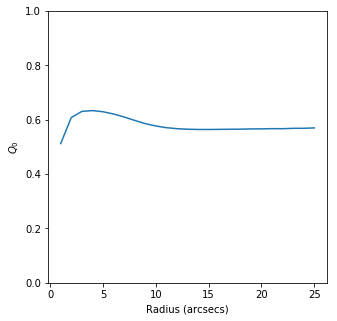

In [16]:
plt.rcParams["figure.figsize"] = (5,5)
plot(rads, q_0_rad)
xlabel("Radius (arcsecs)")
ylabel("$Q_0$")
ylim([0, 1]);